In [1]:
from manim import *
import jupyter_capture_output
from numpy import linalg as npl

video_scene = " -v WARNING --disable_caching stuff_Scene"
image_scene = f" -v WARNING --disable_caching -r {2*427},{2*240}  -s stuff_Scene"

Manim Community v0.18.0.post0

Jupyter Capture Output v0.0.11


In [71]:
%%capture_video --path "animations/stuff/scalar_field.mp4"
%%manim -qh --fps 60 $video_scene

class stuff_Scene(ThreeDScene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2).move_to([-3, 0, 0])
        # self.add(CVC)

        self.camera.background_color = WHITE
        self.set_camera_orientation(phi=75*DEGREES, theta=-45*DEGREES)

        # 3D-Coordinate System
        CO3D = [0, 0, 0]
        CO3D_x_range = (-3.5, 3.5, 1)
        CO3D_y_range = (-3.5, 3.5, 1)
        CO3D_z_range = (-1, 1.5, 1)
        ax = ThreeDAxes(
            x_range = CO3D_x_range, y_range = CO3D_y_range, z_range = CO3D_z_range,
            x_length = 12, y_length = 12, z_length = 6, axis_config = {'tip_length': 0.05, 'tip_width': 0.3}, 
            # axis_config = {'color': BLACK},
            ).move_to(CO3D).set_color(BLACK)
        self.add(ax)


        def scalar_surface(x, y):
            z = (x**2+y**2)*np.exp(1-x**2-y**2)
            return np.array(ax.c2p(x, y, z))

        resolution_fa = 64
        surface_plane = Surface(
            scalar_surface,
            resolution = (resolution_fa, resolution_fa),
            v_range=[-3, +3],
            u_range=[-3, +3]
            )

        surface_plane.set_style(fill_opacity = 1, stroke_color = GREY)
        surface_plane.set_fill_by_checkerboard(GRAY, BLACK, opacity = 0.5)
        self.add(surface_plane)


        timeline = ValueTracker(0)
        self.begin_ambient_camera_rotation(rate=1/PI/2)
        self.play(timeline.animate.set_value(5), rate_func= linear, run_time = 2*19.73)

Output saved by overwring previous file at animations/stuff/scalar_field.mp4.


Output saved by creating file at animations/stuff/VK_para_curve.mp4.


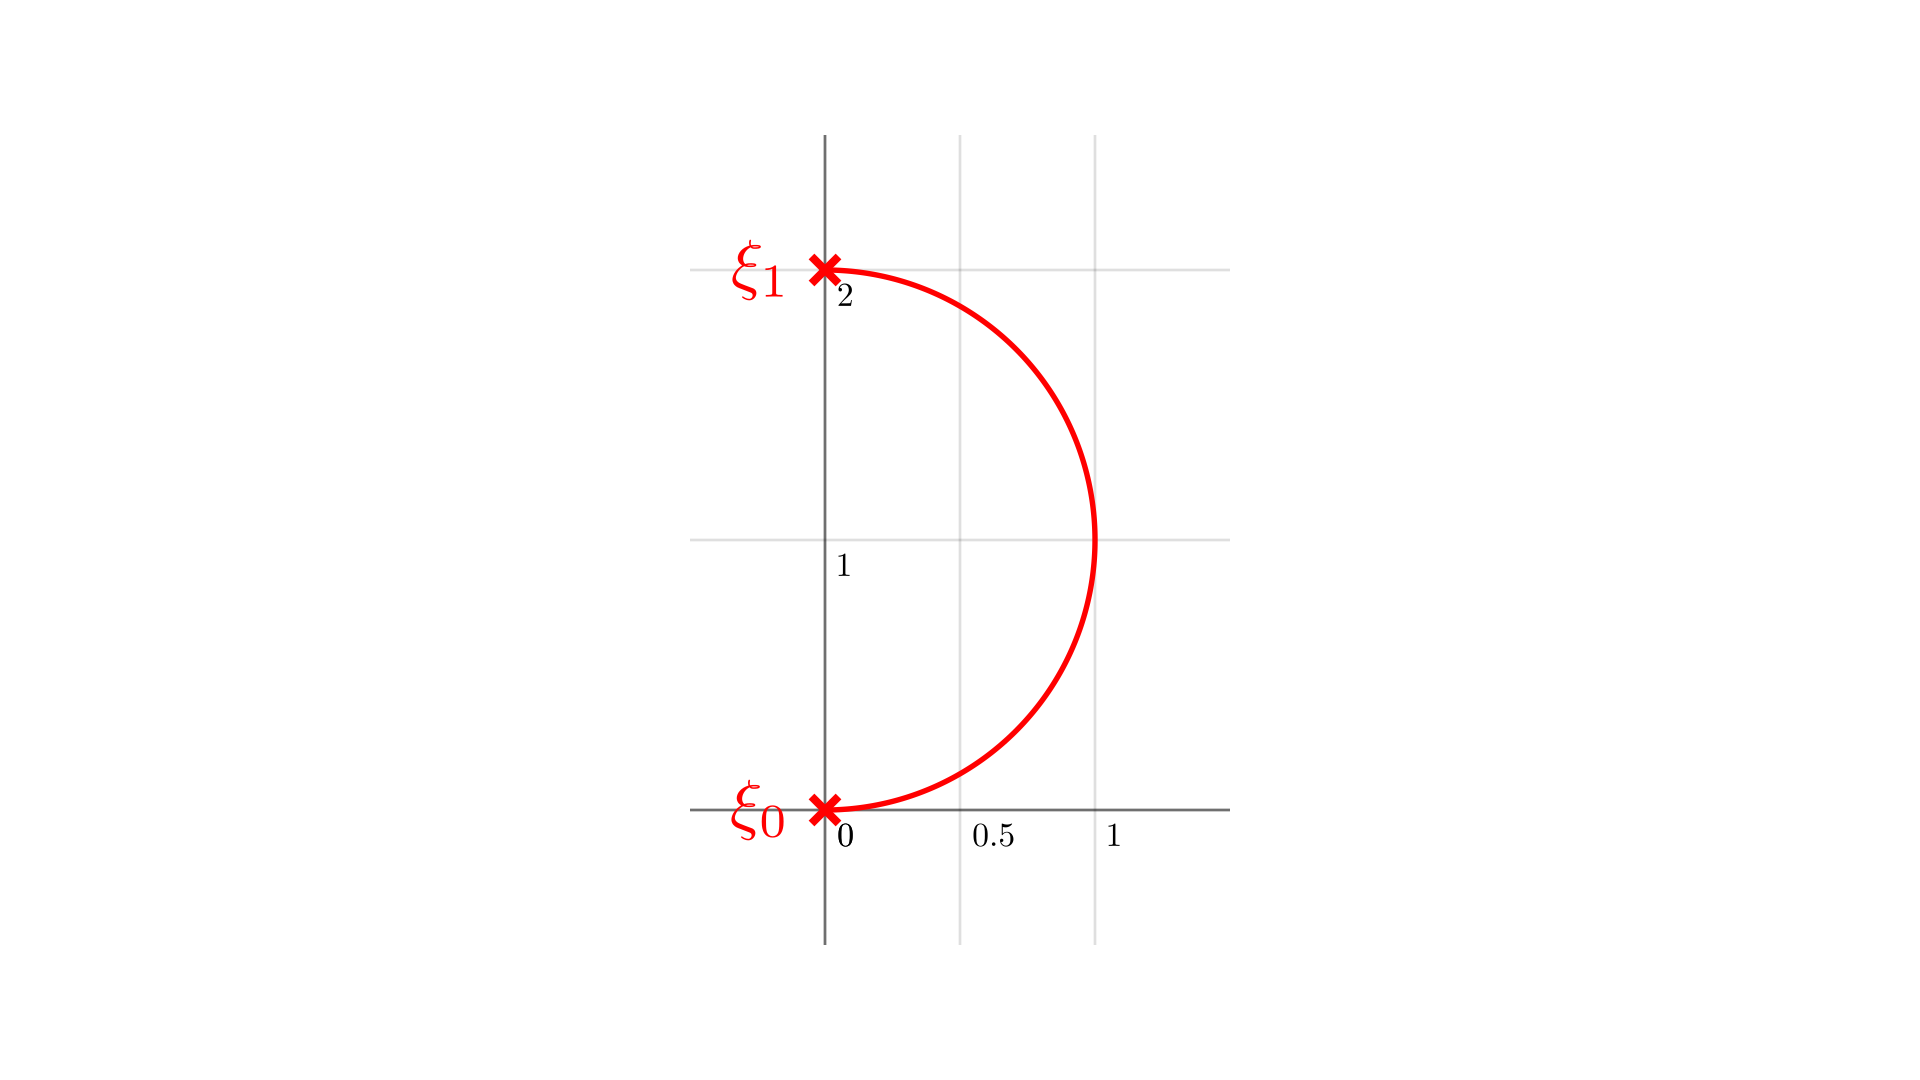

In [3]:
%%capture_video --path "animations/stuff/VK_para_curve.mp4"
%%manim -qh --fps 60 $video_scene

class stuff_Scene(Scene):
    def construct(self):
        self.camera.background_color = WHITE

        x_coord = [0, 0.5, 1]
        y_coord = [0, 1, 2]

        x_dict = dict(zip(x_coord, x_coord))
        y_dict = dict(zip(y_coord, y_coord))

        npla = NumberPlane(
            x_range = [-0.5, 1.5, 0.5], y_range = [-0.5, 2.5], x_length = 4, y_length = 6,
            axis_config = {"stroke_opacity": 0.5, "stroke_color": GREY}, background_line_style = {"stroke_opacity": 0.125, "stroke_color": GRAY}
        ).add_coordinates(x_dict, y_dict).set_color(BLACK)


        def para_func(t):
            # return np.array(npla.c2p(np.sin(t), 2/PI*t, 0))
            return np.array(npla.c2p(np.sin(t), 1+np.cos(t), 0))


        curve_color = PURE_RED
        curve = ParametricFunction(para_func, t_range = (0, PI), color = curve_color)
        self.add(npla, curve)

        xi_0_cross = Cross(scale_factor = 0.1, stroke_color = curve_color).move_to(npla.c2p(0, 0, 0))
        xi_1_cross = Cross(scale_factor = 0.1, stroke_color = curve_color).move_to(npla.c2p(0, 2, 0))
        xi_0 = MathTex(r"\xi_0", color = curve_color).move_to(npla.c2p(0, 0, 0)).shift(LEFT*0.5)
        xi_1 = MathTex(r"\xi_1", color = curve_color).move_to(npla.c2p(0, 2, 0)).shift(LEFT*0.5)
        self.add(xi_0_cross, xi_1_cross, xi_0, xi_1)


Output saved by creating file at animations/stuff/Analphabet.mp4.


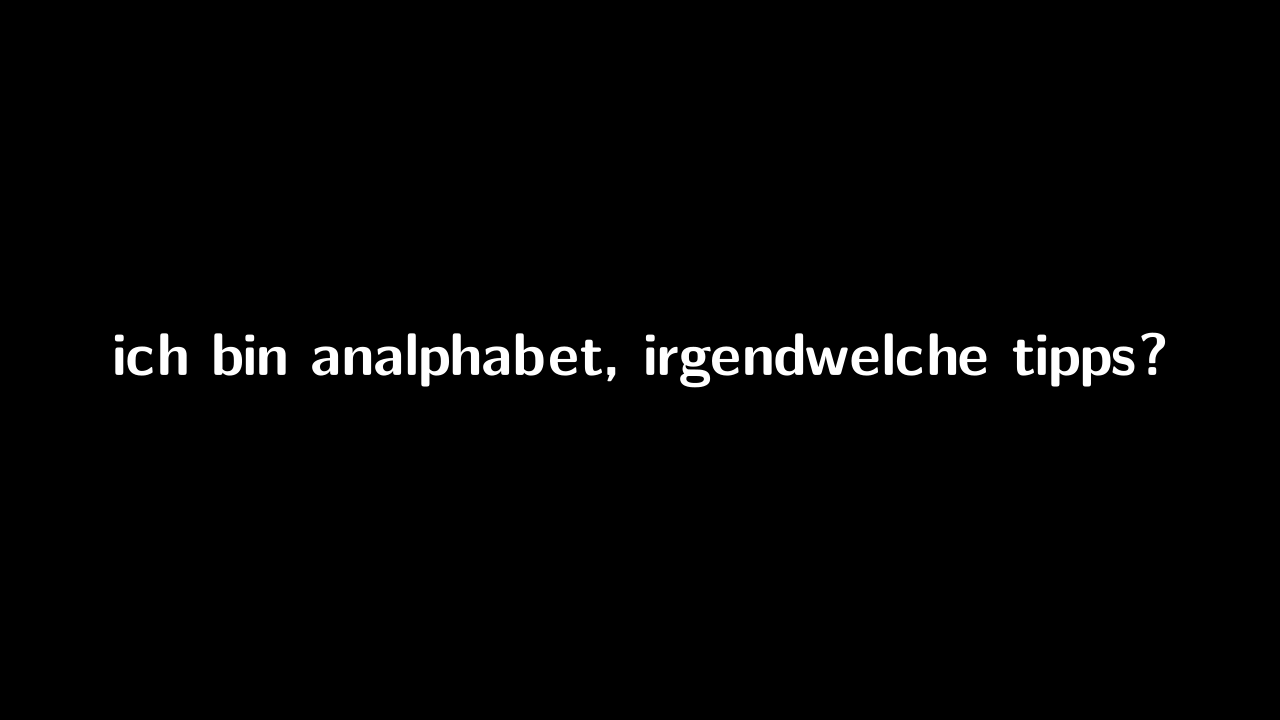

In [3]:
%%capture_video --path "animations/stuff/Analphabet.mp4"
%%manim -qm --fps 60 $video_scene

class stuff_Scene(Scene):
    def construct(self):
        CVC = Text('ich bin analphabet, irgendwelche tipps?', font_size = 48, weight = BOLD, color = WHITE, font = 'Latin Modern Sans')#.align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)

        # headline = Title("Brownian Motion", font_size = 48).align_on_border(UP + LEFT, buff = 0.5).shift(0.5 * RIGHT)  
        # self.add(headline)